# Running New Model to Predict US Deaths By Election Day
updated (October 20th 2020) 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [30]:
# updated data file
us = pd.read_csv('us.csv')
us

,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0
...,...,...,...
268,2020-10-15,8020104,217585
269,2020-10-16,8090568,218494
270,2020-10-17,8143329,219173
271,2020-10-18,8191211,219541


In [ ]:
# prepare data

def make_USA():
    '''function to prepare data '''
    us = pd.read_csv('us.csv')

    us['datetime'] = pd.to_datetime(us['date'])
   
   # Sort by datetime and reset index
    us.sort_values(by = 'datetime')
    us = us.reset_index()
    
    # Summing case count for Western Northern Central by date
    # Groupby to consolidate cases by entire region
    us = us.groupby(["datetime"]).sum()
  
    # Sort by datetime and reset index
    us.sort_values(by = 'datetime')
    us = us.reset_index()
    #wnc_group.tail
    
    # Finish datetime conversion
    us['datetime'] = pd.to_datetime(us['datetime'])
    us['day'] = us['datetime'].map(lambda x: x.day)
    us['month'] = us['datetime'].map(lambda x: x.month)
    us['year'] = us['datetime'].map(lambda x: x.year)

    # Now create new column for growth rate
    #us['growth_rate'] = us['cases'].pct_change()
    # Drop null value
    us = us.dropna()
    us = us
    return us

make_USA()



In [32]:
# store output of function in variable
us = make_USA()
us.sample(8)

,datetime,index,cases,deaths,day,month,year
141,2020-06-10,141,2013298,113103,10,6,2020
2,2020-01-23,2,1,0,23,1,2020
40,2020-03-01,40,88,3,1,3,2020
187,2020-07-26,187,4244554,146753,26,7,2020
51,2020-03-12,51,1668,43,12,3,2020
58,2020-03-19,58,12393,212,19,3,2020
211,2020-08-19,211,5541433,173093,19,8,2020
32,2020-02-22,32,30,0,22,2,2020


In [33]:
# Run model predicting cases

def make_models():
    ''' function to run deaths model'''
    # Make the model
    US_model = LinearRegression()
    
    # Assign the features and the target
    X_Us = us[["day", "month", "year"]]
    y_Us = us[["deaths"]]
    
    # Split the data for training and testing
    X_train_Us, X_test_Us, y_train_Us, y_test_Us = train_test_split(X_Us, y_Us, random_state=42)
    
    # Fit the model with the training data and score it with the testing data
    US_model.fit(X_train_Us, y_train_Us)
    US_model.score(X_test_Us, y_test_Us)
    
    # Make Dataframe for the holidays which will be used for the predicitons:
    # Labor Day, Election Day, Thanksgiving, Christmas

    election_day = {"day": [3], "month": [11], "year": [2020]}
    predict_election = pd.DataFrame(election_day)
    predict_election["datetime"] = pd.to_datetime((predict_election.year*10000 + predict_election.month*100+predict_election.day).apply(str),format='%Y%m%d')   


    
    
    # Predict with the model
    predictions = US_model.predict(predict_election[["day", "month", "year"]])


    # convert predictions from ndarray to list
    preds_arr = []
    for i in predictions:
        preds_arr.append(np.asscalar(i))
    
    # Add the precitions back to the DataFrame and convert from object to 
    # float so we can use it for graphing
    predict_election["predicted_deaths"] = predictions
    predict_election["predicted_deaths"] = predict_election['predicted_deaths'].astype('float')
    
    return predict_election

make_models()

,day,month,year,datetime,predicted_deaths
0,3,11,2020,2020-11-03,240842.631037


In [34]:
predict_election = make_models()
predict_election#[predict_election['predicted_cases']].astype(str)

,day,month,year,datetime,predicted_deaths
0,3,11,2020,2020-11-03,240842.631037


In [ ]:
predict_election['count'] = predict_election['predicted_cases'].astype(str)

In [ ]:
predict_election

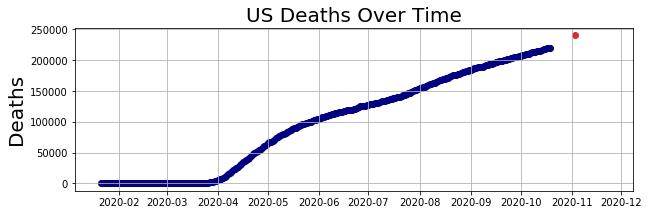

In [36]:
# Graph with Actual Values and Predicitons
plt.figure(figsize = (10, 3))
plt.scatter(predict_election['datetime'],predict_election['predicted_deaths'],c='#d0312d',)
plt.scatter(us['datetime'],us['deaths'],c='#000080',)
plt.grid(True)
plt.title('US Deaths Over Time', fontsize = 20)
plt.ylabel('Deaths', fontsize = 20)
plt.show()


As of October 20th 2020 there been 220,523 deaths in the US caused by Covid-19. Our model above is predicting 240,842 deaths by Election Day, which is just 14 days away. That would mean more then 1400 deaths a day, which seems unlikely given today there were 517 deaths. 

In [37]:
517 * 14

7238

In [38]:
240842-220523

20319

In [39]:
20319/14

1451.357142857143